Tolerance   Minimizer (x1, x2)            Function Value      Iterations  
1.0e-01     (1.812031, 3.278634)          0.035565            10326       
1.0e-02     (1.979583, 3.918262)          0.000419            27996       
1.0e-03     (1.997940, 3.991718)          0.000004            47455       
1.0e-04     (1.999794, 3.999171)          0.000000            67112       
1.0e-05     (1.999979, 3.999917)          0.000000            86789       
1.0e-06     (1.999998, 3.999992)          0.000000            106468      
1.0e-07     (2.000000, 3.999999)          0.000000            126148      
1.0e-08     (2.000000, 4.000000)          0.000000            145827      
1.0e-09     (2.000000, 4.000000)          0.000000            165506      
1.0e-10     (2.000000, 4.000000)          0.000000            185186      
1.0e-11     (2.000000, 4.000000)          0.000000            204871      
1.0e-12     (2.000000, 4.000000)          0.000000            224778      


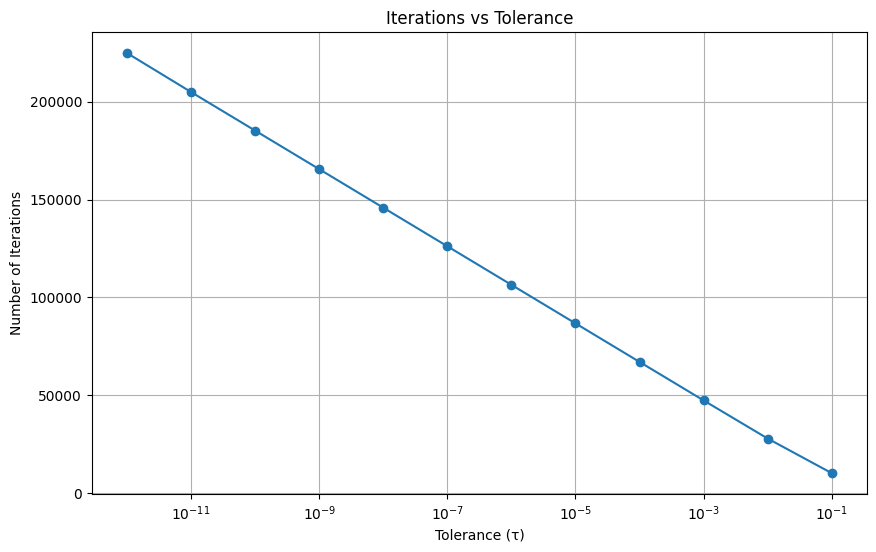

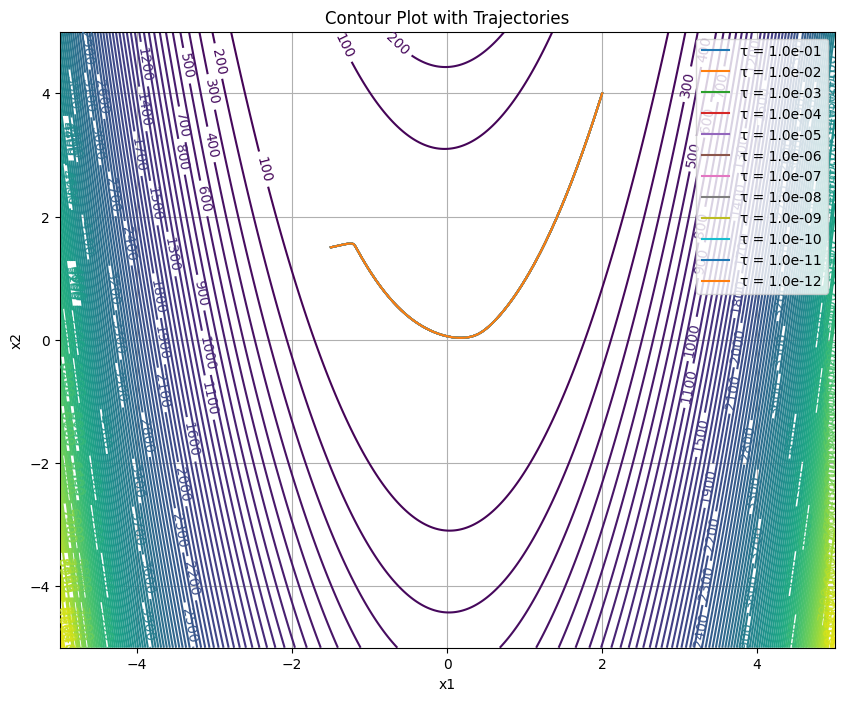

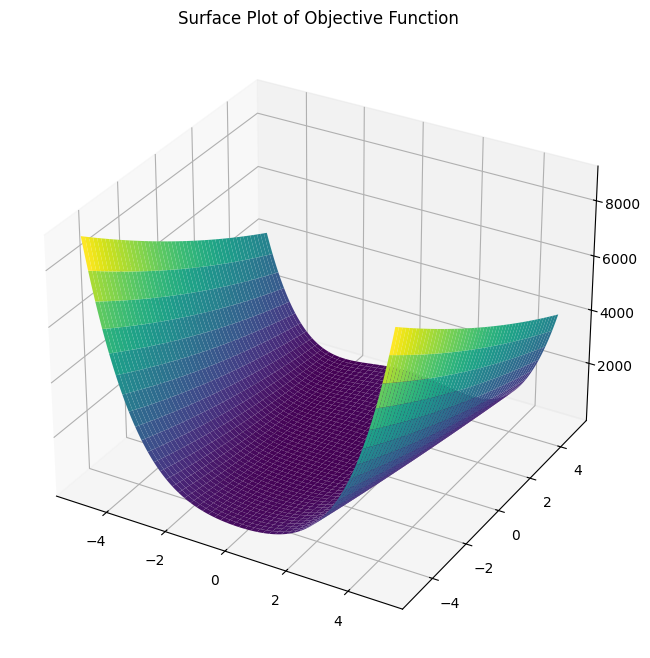

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define problem-specific constants
a = 1
b = 100 if a % 2 == 0 else 10

# Define the objective function
def objective(x1, x2):
    return (a + 1 - x1)**2 + b * (x2 - x1**2)**2

# Gradient components for the objective function
def gradient_x1(x1, x2):
    return -2 * (a + 1 - x1) - 4 * b * x1 * (x2 - x1**2)

def gradient_x2(x1, x2):
    return 2 * b * (x2 - x1**2)

# Calculate gradient norm
def gradient_magnitude(x1, x2):
    return np.sqrt(gradient_x1(x1, x2)**2 + gradient_x2(x1, x2)**2)

# Initial guess and learning rate
initial_point = np.array([-1.5, 1.5])
learning_rate = 0.001
tolerances = [10**(-p) for p in range(1, 13)]  # Different tolerance levels
optimization_results = []
trajectory_dict = {}

# Iterate over different tolerance values
for tolerance in tolerances:
    x1, x2 = initial_point
    iterations = 0
    trajectory = [(x1, x2)]

    # Gradient Descent Loop
    while gradient_magnitude(x1, x2) > tolerance:
        grad1 = gradient_x1(x1, x2)
        grad2 = gradient_x2(x1, x2)

        # Update the values using gradient descent
        x1 -= learning_rate * grad1
        x2 -= learning_rate * grad2

        trajectory.append((x1, x2))
        iterations += 1

    # Store the results for the current tolerance
    optimization_results.append((tolerance, (x1, x2), objective(x1, x2), iterations))
    trajectory_dict[tolerance] = trajectory

# Display the results
print(f"{'Tolerance':<12}{'Minimizer (x1, x2)':<30}{'Function Value':<20}{'Iterations':<12}")
for tolerance, (x_opt, y_opt), obj_value, iter_count in optimization_results:
    minimizer_str = f"({x_opt:.6f}, {y_opt:.6f})"
    print(f"{tolerance:<12.1e}{minimizer_str:<30}{obj_value:<20.6f}{iter_count:<12}")

# Plot: Number of Iterations vs Tolerance
tolerance_vals = [res[0] for res in optimization_results]
iteration_vals = [res[3] for res in optimization_results]

plt.figure(figsize=(10, 6))
plt.plot(tolerance_vals, iteration_vals, marker='o')
plt.xscale('log')
plt.xlabel('Tolerance (τ)')
plt.ylabel('Number of Iterations')
plt.title('Iterations vs Tolerance')
plt.grid(True)
plt.show()

# Contour Plot: Objective function and Optimization Trajectories
x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = objective(X, Y)

plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=100, cmap='viridis')
plt.clabel(contour, inline=True)
for tolerance, traj in trajectory_dict.items():
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], label=f"τ = {tolerance:.1e}")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot with Trajectories')
plt.legend()
plt.grid(True)
plt.show()

# 3D Surface Plot of the Objective Function
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title('Surface Plot of Objective Function')
plt.show()
